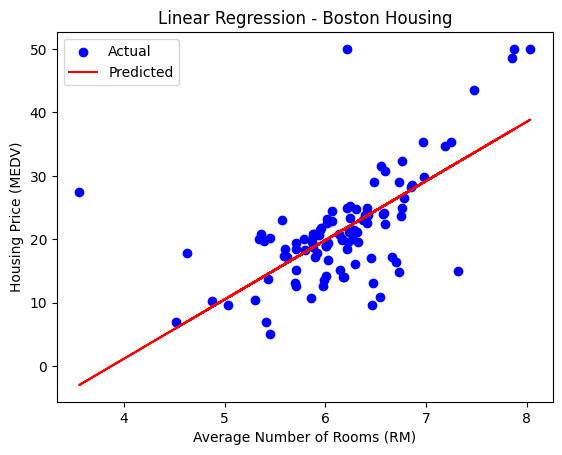

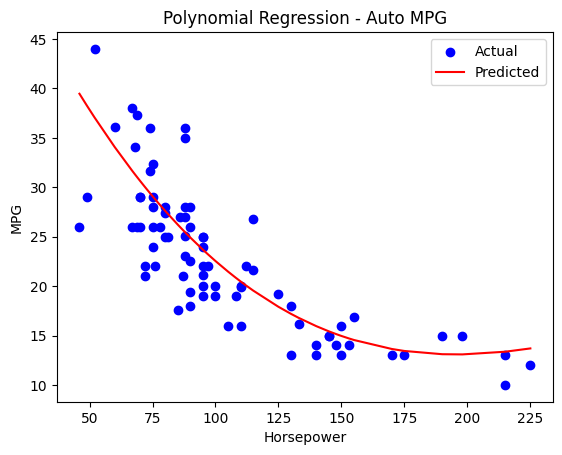

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

boston = pd.read_csv('Boston_housing_dataset.csv')
X = boston[['RM']]
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Housing Price (MEDV)')
plt.title('Linear Regression - Boston Housing')
plt.legend()
plt.show()

auto = pd.read_csv('auto_mpg_old.csv', na_values='?')
auto = auto.dropna()
X = auto[['horsepower']]
y = auto['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly_scaled, y_train)
y_poly_pred = lr_poly.predict(X_test_poly_scaled)
sorted_idx = X_test['horsepower'].argsort()
plt.scatter(X_test['horsepower'], y_test, color='blue', label='Actual')
plt.plot(X_test['horsepower'].iloc[sorted_idx], y_poly_pred[sorted_idx], color='red', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression - Auto MPG')
plt.legend()
plt.show()